In [561]:
#import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

Importing dataset
1 Since data is in form of excel file we have to use pandas read_excel to load the data

2 After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row

3 Check whether any null values are there or not. if it is present then following can be done,
Imputing data using Imputation method in sklearn

4 Filling NaN values with mean, median and mode using fillna() method

5 Describe data --> which can give statistical analysis

In [562]:
# load dataset from kaggle
train_data = pd.read_excel("C:/Users/NOOMAN KHAN/Downloads/Data_Train (2).xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [563]:
# shape of the train data
train_data.shape

(10683, 11)

In [564]:
# information about dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [565]:
# checking null
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [566]:
# make a copy of data 
df = train_data.copy()

In [567]:
# above we can see ther is only very few nulll we can drop it
df = df.dropna()

In [568]:
# after checking nulls
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [569]:
pd.set_option("display.max_columns" , None)

Data Exploration and Data cleaning 

In [570]:
# duration
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [571]:
# try to see each data points usingv values count
for i in df.columns:
    print(df[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


##### EDA

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction


For this we require pandas to_datetime to convert object data type to datetime dtype.


.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [572]:
df["Journey_Day"] = pd.to_datetime(df.Date_of_Journey,format = "%d/%m/%Y").dt.day

In [573]:
df["Journey_month"] = pd.to_datetime(df.Date_of_Journey,format = "%d/%m/%Y").dt.month

In [574]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [575]:
# we have extract month and day from Date_of_journey know we can easily drop it
df = df.drop(["Date_of_Journey"] , axis = 1)

In [576]:
# now we have to extract hours and minute from Dep_Time/Arrival Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df["Arr_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arr_minutr"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [577]:
df = df.rename(columns = {"Arr_minutr":"Arr_min"})

In [578]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [579]:
# we have extract min and hours now we can drop original columns
df = df.drop(["Dep_Time","Arrival_Time"],axis = 1)

In [580]:
# extracting minute and hours from duration
duration = list(df["Duration"])
duration[1].split()
 
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h "+duration[i]
duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(duration[i].split("h")[0])
    duration_min.append(duration[i].split("m")[0].split()[-1])
    
            

In [581]:
# try to see both have same data points
len(duration_hour),len(duration_min)

(10682, 10682)

In [582]:
# make two new columns pass the duration_hour, duration_min
df["duration_hour"] = duration_hour
df["duration_min"] = duration_min

In [583]:
# checking datatypes of each features
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arr_hour            int64
Arr_min             int64
duration_hour      object
duration_min       object
dtype: object

In [584]:
# we have extractd min and hour know we can drop original columns
df = df.drop(["Duration"],axis = 1)

#### Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case


Ordinal data --> data are in order --> LabelEncoder is used in this case

In [585]:
# count of different airlines
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

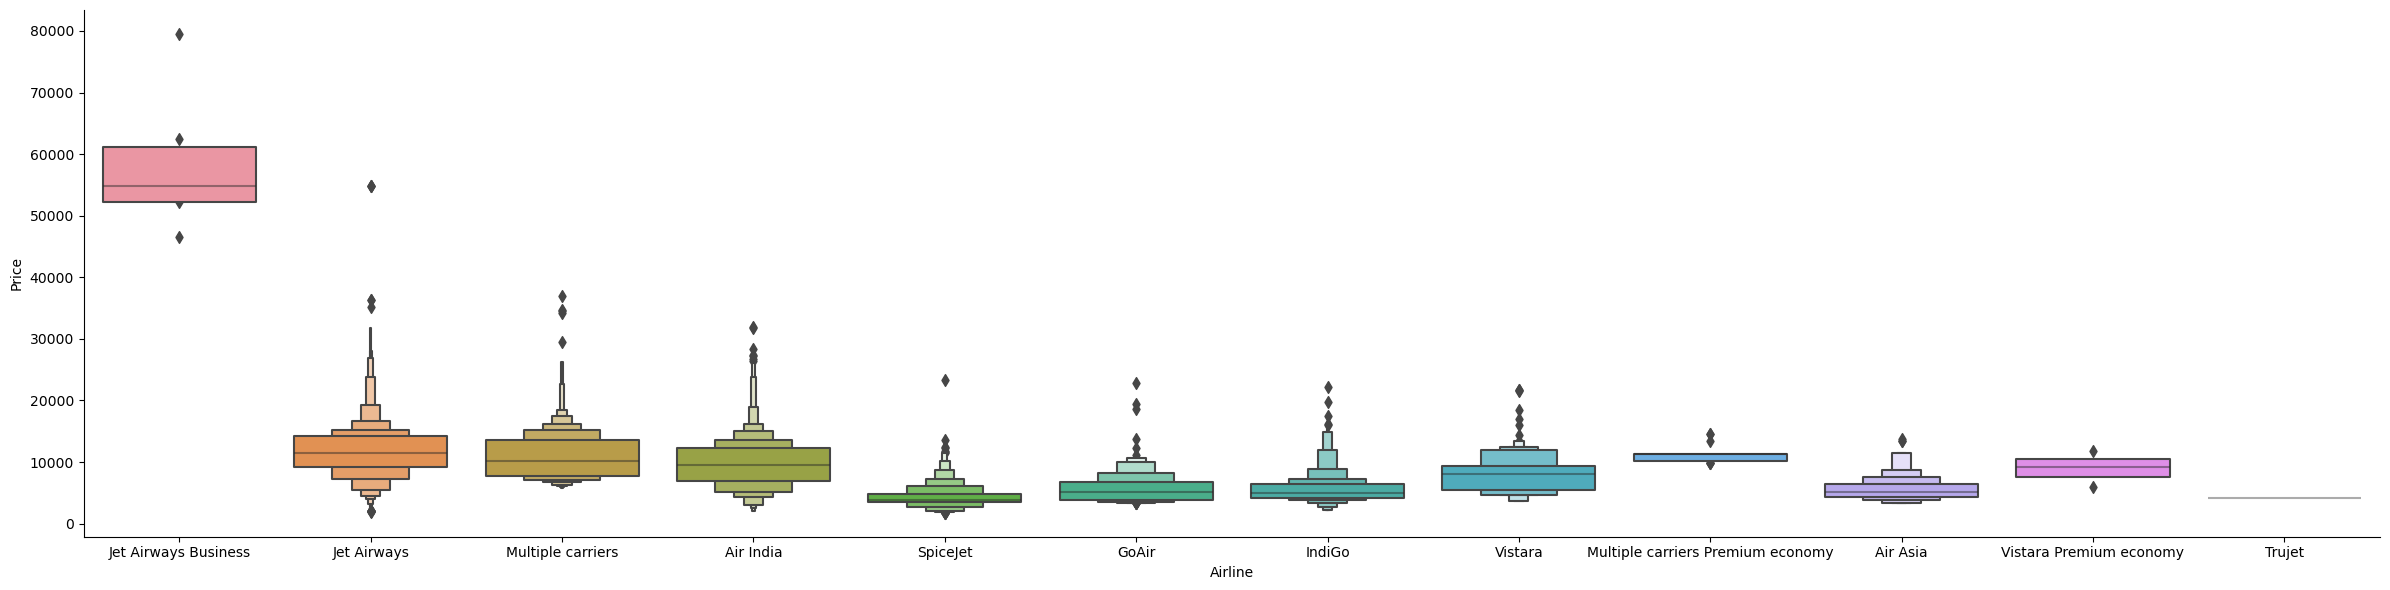

In [586]:
# Check impact of Airline on Our target variable
sns.catplot(x = "Airline" , y = "Price" , data = df.sort_values(by = "Price",ascending = False
                                                               ),height = 6 , aspect = 4,
           kind = "boxen")
plt.show()

In [587]:
# do one hot coding on air line 
Airline = df[["Airline"]]
Airline = pd.get_dummies(data = Airline  , drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [588]:
# difference sources
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

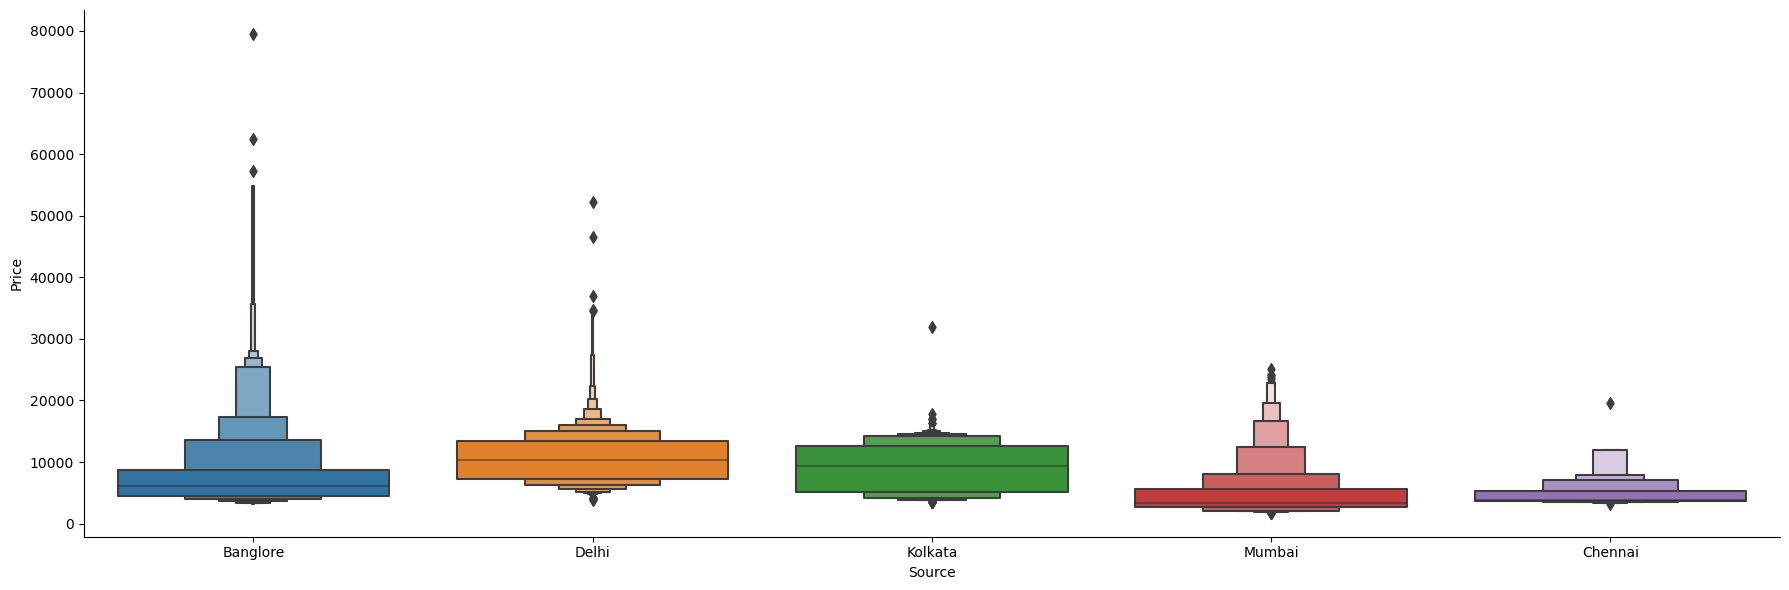

In [589]:
# effect of source on price
sns.catplot(x = "Source" , y = "Price" , data = df.sort_values(by = "Price",ascending = False
                                                               ),height = 6 , aspect = 3,
           kind = "boxen")
plt.show()

In [590]:
# do one hot encoding on price
Source = df[["Source"]]
Source = pd.get_dummies(data =  Source  , drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [591]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

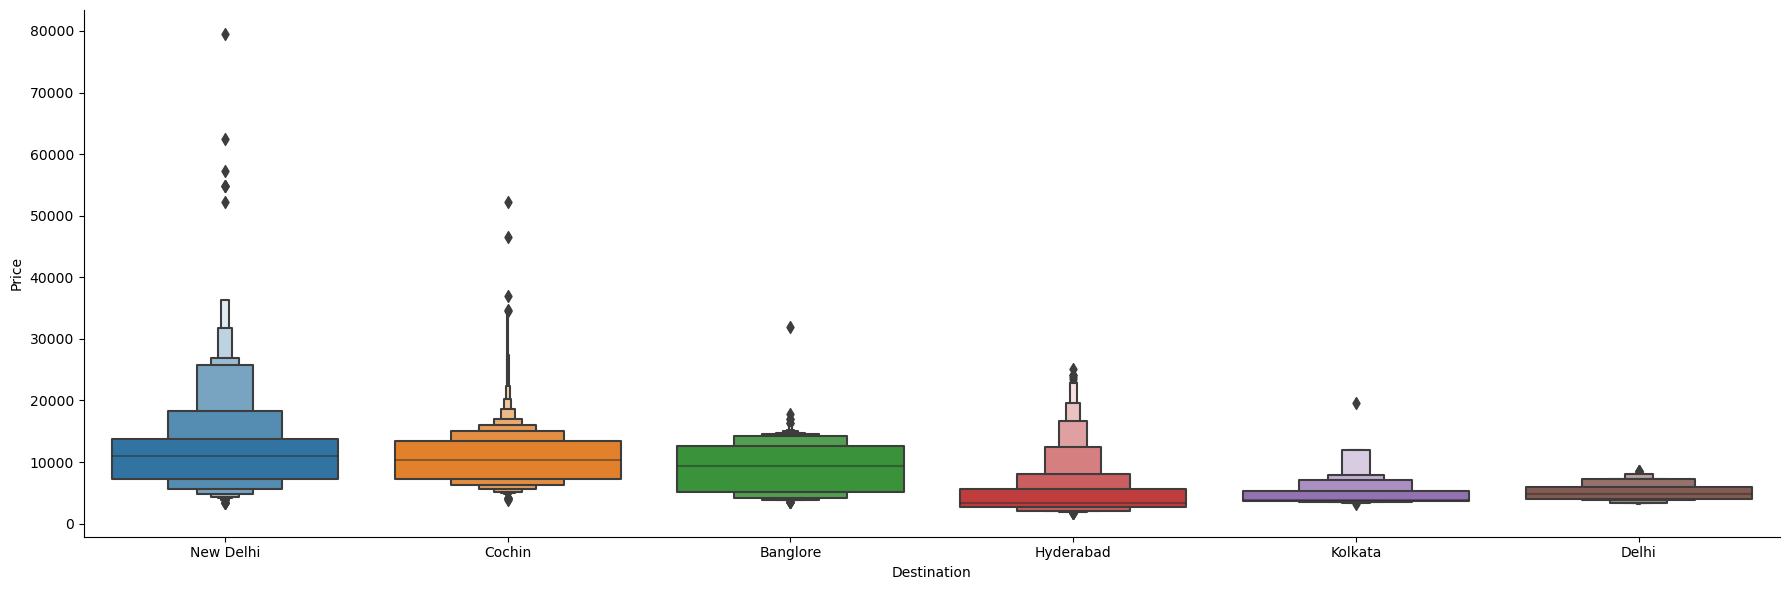

In [592]:
# effect of Destination on price
sns.catplot(x = "Destination" , y = "Price" , data = df.sort_values(by = "Price",ascending = False
                                                               ),height = 6 , aspect = 3,
           kind = "boxen")
plt.show()

In [593]:
# do one hot encoding on price
Destination = df[["Destination"]]
Destination = pd.get_dummies(data =  Destination  , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [594]:
# this is ordinal feature we have to do label encoding
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

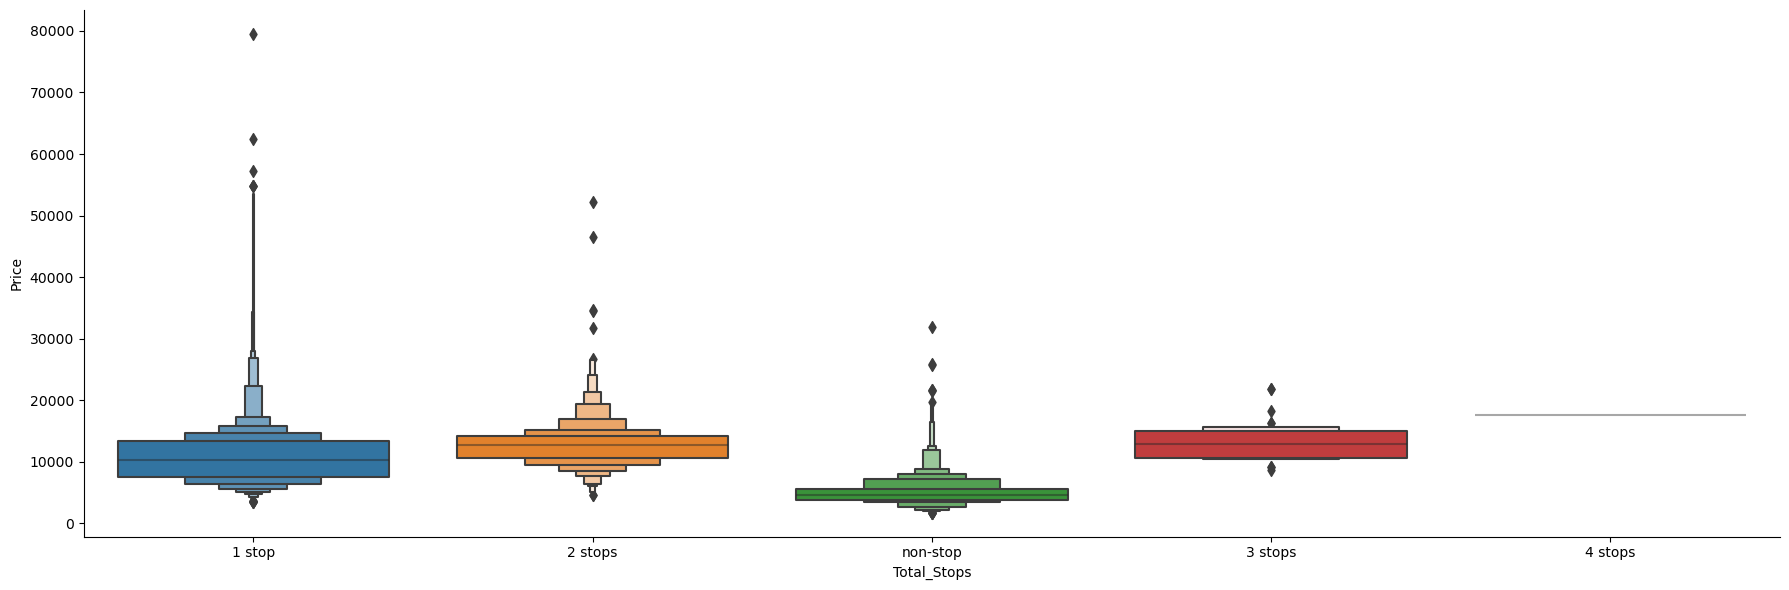

In [595]:
# effect of total stops on price
sns.catplot(x = "Total_Stops" , y = "Price" , data = df.sort_values(by = "Price",ascending = False
                                                               ),height = 6 , aspect = 3,
           kind = "boxen")
plt.show()

In [596]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [597]:
# replace with numerical value
df = df.replace({"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4})

In [598]:
df["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [599]:
# differents routs
df["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [600]:
# different additional info
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [601]:
# 128 different categries if we do encoding our data become so complex
# in Additional info 80% data is No info does'nt make ant sence
df = df.drop(["Route","Additional_Info"],axis = 1)

In [602]:
# Drop original one
df = df.drop(["Airline","Source","Destination"] , axis = 1)

In [603]:
F_data = df

In [604]:
# concat with encoded one 
df = pd.concat([df,Airline,Source,Destination] , axis = 1)

In [605]:
# chnge type to int
df[["duration_hour","duration_min"]] = df[["duration_hour","duration_min"]].astype("int64")

In [606]:
# seprate dependent and indpendent features
X_train = df.drop("Price",axis = 1)
Y_train = df[["Price"]]

In [607]:
# Airline_Turjet have only one record thats drop it
X_train = X_train.drop(["Airline_Trujet"],axis=1) 

In [608]:
# load test data from kaggle
df1 = pd.read_excel("C:/Users/NOOMAN KHAN/Downloads/Test_set.xlsx")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [609]:
# do same thing on test data aslo
df1["Journey_Day"] = pd.to_datetime(df1.Date_of_Journey,format = "%d/%m/%Y").dt.day
df1["Journey_month"] = pd.to_datetime(df1.Date_of_Journey,format = "%d/%m/%Y").dt.month
df1 = df1.drop(["Date_of_Journey"] , axis = 1)

df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute
df1["Arr_hour"] = pd.to_datetime(df1["Arrival_Time"]).dt.hour
df1["Arr_minutr"] = pd.to_datetime(df1["Arrival_Time"]).dt.hour

df1 = df1.rename(columns = {"Arr_minutr":"Arr_min"})

df1 = df1.drop(["Dep_Time","Arrival_Time"],axis = 1)

duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h "+duration[i]
duration_hour = []
duration_min = []
for i in range(len(duration)):
    duration_hour.append(duration[i].split("h")[0])
    duration_min.append(duration[i].split("m")[0].split()[-1])
    
df1["duration_hour"] = duration_hour
df1["duration_min"] = duration_min
df1 = df1.drop(["Duration"],axis = 1)

Airline = df1[["Airline"]]
Airline = pd.get_dummies(data = Airline  , drop_first=True)
Source = df1[["Source"]]
Source = pd.get_dummies(data =  Source  , drop_first=True)
Destination = df1[["Destination"]]
Destination = pd.get_dummies(data =  Destination  , drop_first=True)
df1 = df1.replace({"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4})

df1 = df1.drop(["Route","Additional_Info"],axis = 1)
df1 = df1.drop(["Airline","Source","Destination"] , axis = 1)
df1 = pd.concat([df1,Airline,Source,Destination] , axis = 1)
df1


,Total_Stops,Journey_Day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,4,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,10,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,19,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,21,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,2,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,20,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,16,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,4,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,19,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [610]:
df1.isnull().sum()

Total_Stops                                  0
Journey_Day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arr_hour                                     0
Arr_min                                      0
duration_hour                                0
duration_min                                 0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkat

Feature Selection

df

In [611]:
F_data.dtypes

Total_Stops       int64
Price             int64
Journey_Day       int64
Journey_month     int64
Dep_hour          int64
Dep_min           int64
Arr_hour          int64
Arr_min           int64
duration_hour    object
duration_min     object
dtype: object

In [612]:
F_data[["duration_hour","duration_min"]] = F_data[["duration_hour","duration_min"]].astype("int64")

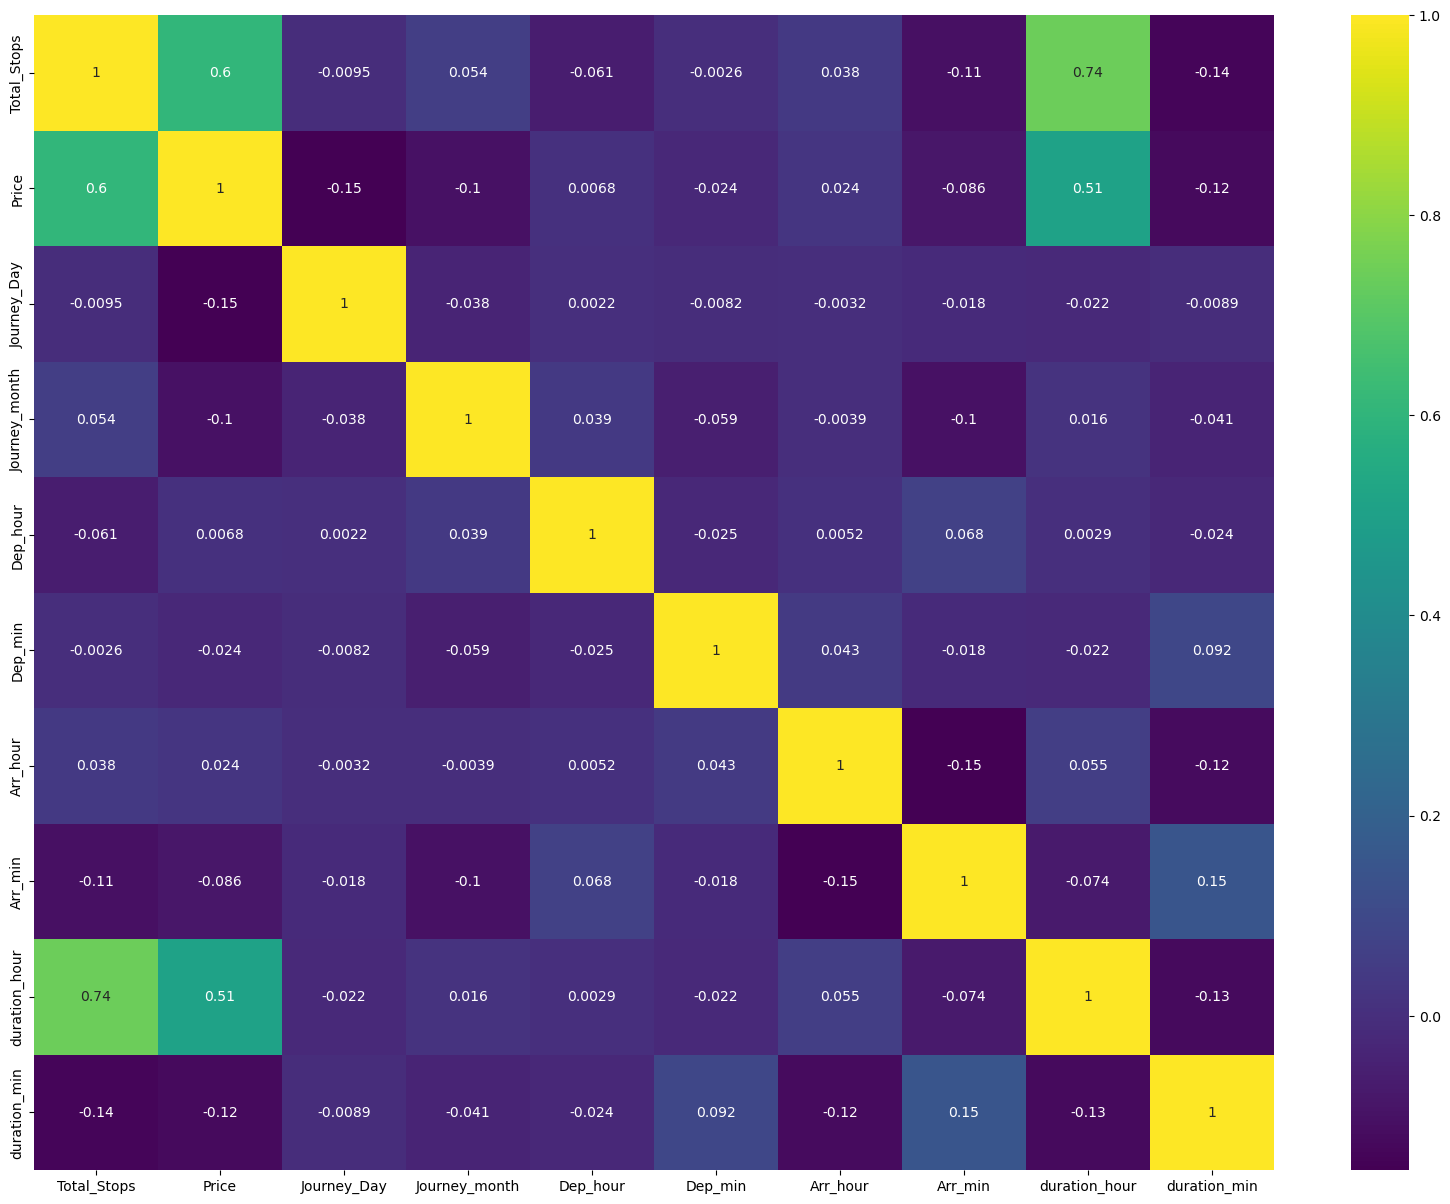

In [613]:
plt.figure(figsize = (20,15))
sns.heatmap(F_data.corr(),annot = True , cmap = "viridis")
plt.show()

In [614]:
# imp feature using ExtraTreeRegressor

In [615]:
from sklearn.ensemble import  ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train , Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12040\1158080014.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X_train , Y_train)


ExtraTreesRegressor()

In [616]:
selection.feature_importances_

array([2.15154793e-01, 1.42806002e-01, 5.36940410e-02, 2.40505701e-02,
       2.15409273e-02, 2.87462302e-02, 1.96372535e-02, 1.26655247e-01,
       1.76635983e-02, 1.03375573e-02, 1.70434332e-03, 1.64133480e-02,
       1.45711180e-01, 6.78071552e-02, 1.91978126e-02, 9.09585275e-04,
       2.71952024e-03, 5.06846985e-03, 8.53895478e-05, 4.16300465e-04,
       1.04164297e-02, 3.20925557e-03, 8.04938196e-03, 1.10831926e-02,
       1.56875046e-02, 5.58594277e-03, 4.24637256e-04, 2.52243308e-02])

In [617]:
sum(selection.feature_importances_)

1.0000000000000002

In [618]:
feat_importan = pd.Series(data = selection.feature_importances_,index = X_train.columns)

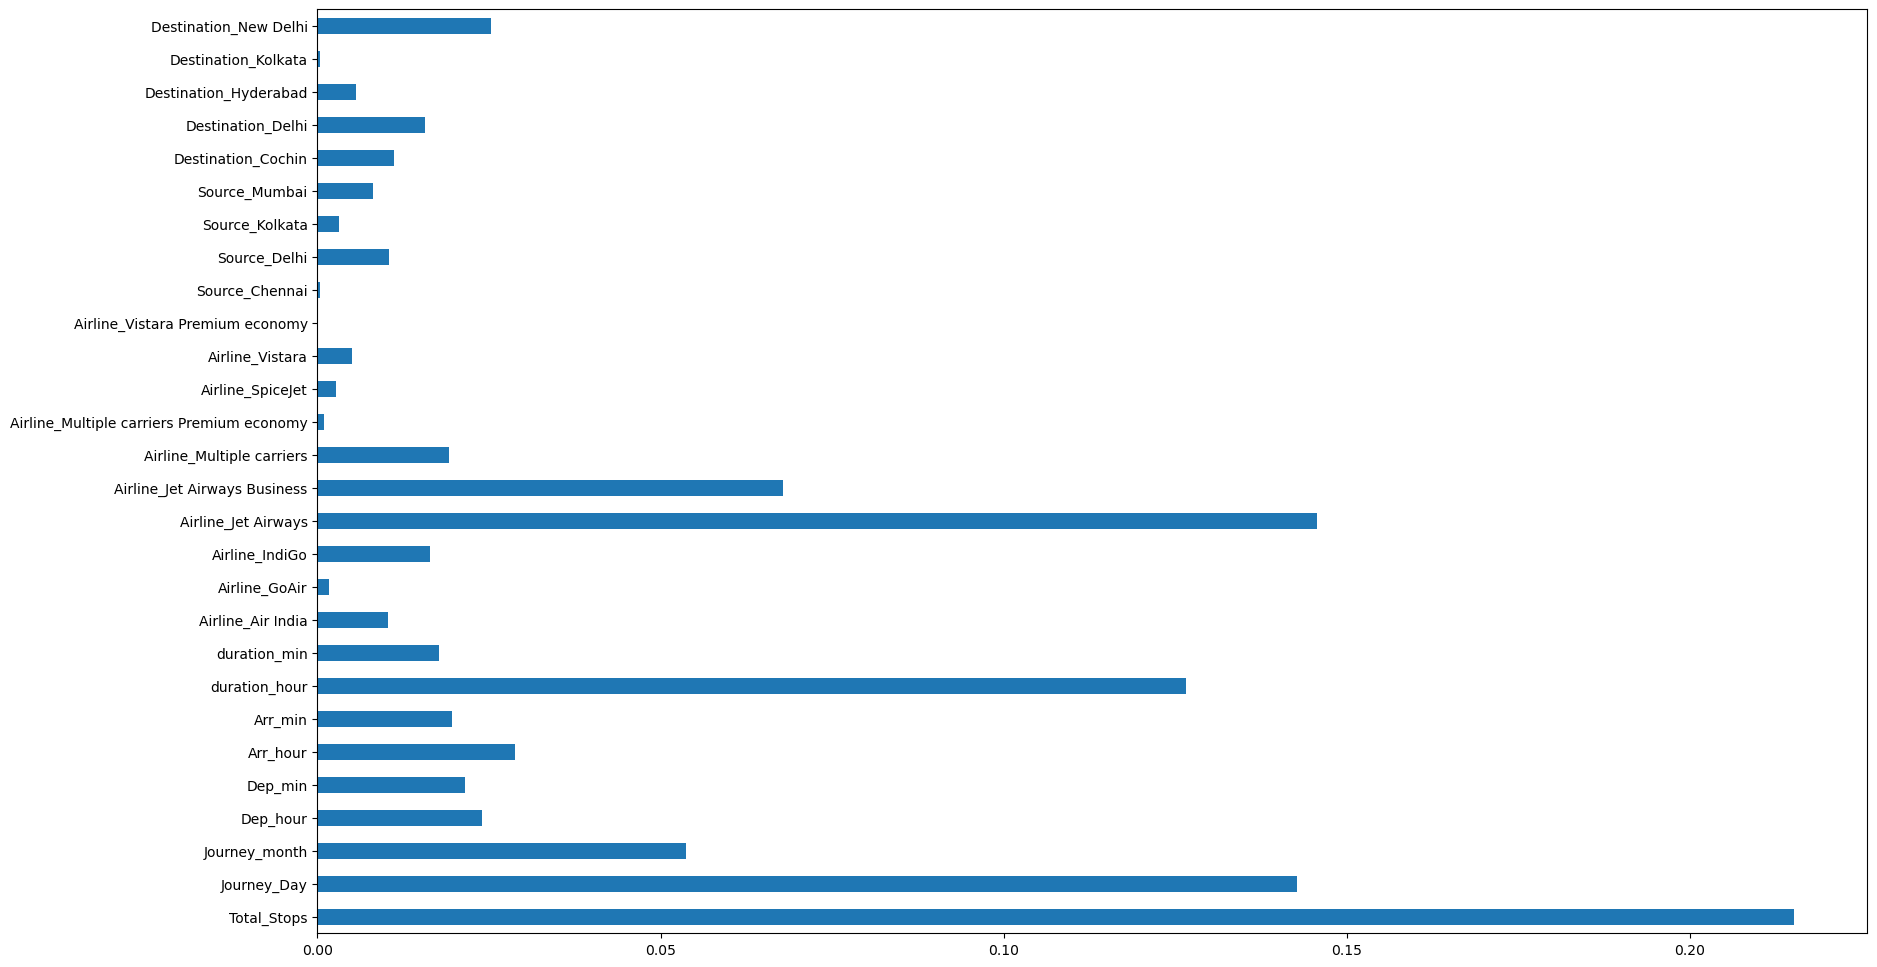

In [619]:
plt.figure(figsize = (20,12))
feat_importan.plot(kind = "barh")
plt.show()

Linear Regression

In [620]:
# split train data the into train and test again
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train , test_size = 0.2,random_state = 42)

In [621]:
# scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [622]:
# import linear regression
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train, Y_train)

LinearRegression()

In [623]:
Y_pred = le.predict(X_test)

In [624]:
# testing accuracy
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.6196029298745245

In [625]:
print("MAE  ", metrics.mean_absolute_error(Y_test,Y_pred))
print("MSE  ", metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE  " ,np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE   1972.8693700484102
MSE   8202143.051591623
RMSE   2863.9383812490837


Random Forest

In [626]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12040\3907687094.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestRegressor()

In [627]:
Y_pred = model.predict(X_test)

In [628]:
# testing accuracy
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.7956361324419677

In [629]:
# training accuracy
Y_pred_t = model.predict(X_train)
metrics.r2_score(Y_train,Y_pred_t)

0.9536452990151463

In [630]:
# sns.scatterplot(Y_test.values.ravel(),Y_pred , alpha = 0.3)
# plt.xlabel("Y_test")
# plt.ylabel("Y_pred")
# plt.show()

In [631]:
Y_test = Y_test.values.ravel()

In [632]:
print("MAE  ", metrics.mean_absolute_error(Y_test,Y_pred))
print("MSE  ", metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE  " ,np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))


MAE   1179.8949437957017
MSE   4406505.222909831
RMSE   2099.1677453004636


Hyperparameter Tuning

Choose following method for hyperparameter tuning

RandomizedSearchCV --> Fast

GridSearchCV

Assign hyperparameters in form of dictionery

Fit the model

Check best paramters and best score

In [633]:
from sklearn.model_selection import RandomizedSearchCV

In [634]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [635]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [636]:
Random_grid = RandomizedSearchCV(estimator = model,param_distributions=random_grid,cv=5,n_jobs=-1
                                ,n_iter=50,verbose = 2)

In [637]:
Random_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [638]:
Random_grid.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [639]:
RFR = RandomForestRegressor(n_estimators=1200,
 min_samples_split=5,
 min_samples_leaf=2,
max_features='auto',
 max_depth = 15)

In [640]:
RFR.fit(X_train,Y_train)

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12040\3793850730.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(X_train,Y_train)
C:\Users\NOOMAN KHAN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=15, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1200)

In [641]:
Y_pred = RFR.predict(X_test)

In [642]:
metrics.r2_score(Y_test,Y_pred)

0.8163945150872772

C:\Users\NOOMAN KHAN\AppData\Local\Temp\ipykernel_12040\1195640611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = Y_test-Y_pred)


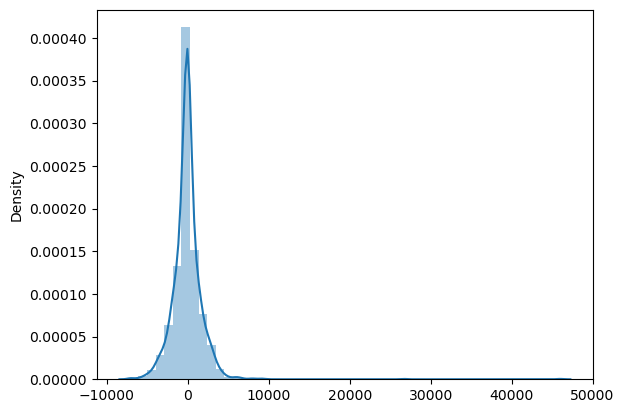

In [643]:
sns.distplot(x = Y_test-Y_pred)
plt.show()

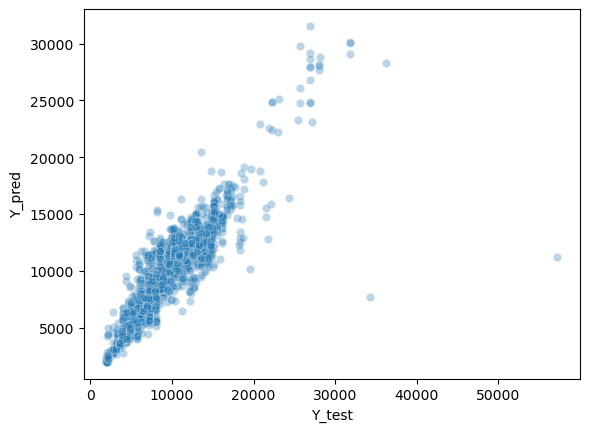

In [644]:
sns.scatterplot(x = Y_test,y = Y_pred , alpha = 0.3)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [645]:
print("MAE  ", metrics.mean_absolute_error(Y_test,Y_pred))
print("MSE  ", metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE  " ,np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE   1136.687000642425
MSE   3958911.807113165
RMSE   1989.70143667666


In [646]:
import pickle
# open a file, where you ant to store the data
# serilize
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(RFR, file)

In [647]:
# unserilize
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [648]:
y_prediction = forest.predict(X_test)

In [649]:
metrics.r2_score(Y_test, y_prediction)

0.8163945150872772